Dataset shape: (1797, 8, 8)
Number of samples: 1797
Number of features per sample: 64
Target labels (digits): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


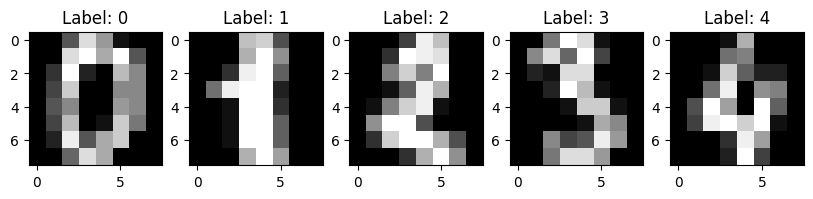

Training set shape: (1347, 64)
Test set shape: (450, 64)

Linear Kernel SVM Performance:
Accuracy: 97.78%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       1.00      0.95      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


RBF Kernel SVM Performance:
Accuracy: 98.44%
              precision    recall  f1-score   support

           0       1.00      1.00 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset 
digits = datasets.load_digits()

# Inspect the dataset
print(f"Dataset shape: {digits.images.shape}") 
print(f"Number of samples: {len(digits.images)}")
print(f"Number of features per sample: {digits.data.shape[1]}")
print(f"Target labels (digits): {set(digits.target)}")

# Display a few images with their labels
fig, axes = plt.subplots(1, 5, figsize=(10, 3)) 
for i, ax in enumerate(axes): 
    ax.imshow(digits.images[i], cmap='gray') 
    ax.set_title(f"Label: {digits.target[i]}")
plt.show()

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Flatten the images for input to the SVM model 
X = digits.data  # Shape: (1797, 64) - each sample has 64 pixel features
y = digits.target  # Shape: (1797,) - target labels (digits 0-9)

# Normalize the pixel values to a standard scale 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

# Split the dataset into 75% training and 25% testing 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Check the shapes of the train and test sets 
print(f"Training set shape: {X_train.shape}") 
print(f"Test set shape: {X_test.shape}")

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, accuracy_score

#Train the SVM model with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42) 
svm_linear.fit(X_train, y_train)

#Make predictions
y_pred_linear = svm_linear.predict(X_test)

#Evaluate the model performance
print("\nLinear Kernel SVM Performance:")
print (f"Accuracy: {accuracy_score(y_test, y_pred_linear) * 100:.2f}%")
print(classification_report(y_test,y_pred_linear))

# Train the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma ='auto', random_state=42) 
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model performance
print("\nRBF Kernel SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf) *100:.2f}%")
print(classification_report(y_test,y_pred_rbf))